In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

import numpy as np
%matplotlib inline

### CSC 217 - Final Exam

For your final exam, you will be looking at a dataset from FiveThirtyEight that looks at the voting record of each member of the House of Representatives ever since Donald Trump has been elected. There are eight columns: last name, state, party (Republican or Democrat), votes (the total number of votes they cast), votes_for (the total number of votes they made that agreed with Trump's position on the issue), votes_against (the total number of votes they made that disagreed with Trump's position on the issue), vote_percentage (the percentage of their votes that agreed with Trump's position) and GDP (the GDP of the state their district is in). Keep in mind that there are multiple representatives for most states. As an FYI, this data spans records from the last two Congresses (115th and 116th).

The data DOES NOT need to be cleaned beyond what has been provided.

Please write out your answer for each question.

There are 14 total questions and a bonus question. There are 70 possible points - the maximum score possible is 75/70 after the bonus question. Partial credit may be awarded on questions under my discretion.

The exam is due to me (via email - evan.agovino.ccny@gmail.com) by 9 PM on Wednesday, May 22nd. Late submissions will not be accepted.

Good luck and please reach out to me via email or Slack (preferably Slack) with questions.

In [91]:
total_df = pd.read_csv('total_df.csv')
total_df.head()

,last_name,state,party,votes,votes_for,votes_against,vote_percentage,gdp
0,Abraham,LA,R,222,208,14,0.936937,53589
1,Adams,NC,D,236,31,204,0.135593,54441
2,Aderholt,AL,R,244,238,6,0.975410,45219
3,Aguilar,CA,D,242,52,190,0.214876,74205
4,Allen,GA,R,244,236,7,0.967213,55832


    1. How many members are in each party? (3 points)

In [92]:
total_df['party'].value_counts()

R    275
D    256
Name: party, dtype: int64

#### There are 275 Republican members and 256 Democratic members.

    2. Which state has the most representatives? How many representatives does it have? (4 points)

In [93]:
total_reps_per_state = total_df['state'].value_counts()
total_reps_per_state.head()

CA    61
TX    45
FL    31
NY    31
PA    26
Name: state, dtype: int64

In [94]:
total_reps_per_state.max()

61

#### California has the most representatives, it has 61 representatives.

    3. Plot a histogram of the vote percentage for each state and describe what it looks like. (3 points)

Text(0.5, 0.92, 'Vote Percentage Per State')

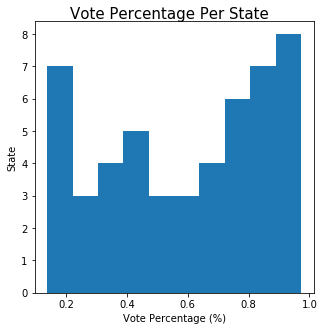

In [95]:
fig = plt.figure(figsize=(5,5))
df = total_df.groupby('state')['vote_percentage'].mean()
plt.hist(df)
plt.xlabel('Vote Percentage (%)')
plt.ylabel('State')
fig.suptitle('Vote Percentage Per State', fontsize=15, y=0.92)

#### The histogram is skewed negatively (skewed left). 

    4. What is the maximum vote percentage in the dataset? How many representatives have that maximum vote percentage? (4 points)

In [96]:
max_vote = total_df['vote_percentage'].max()
total_df[total_df['vote_percentage'] == max_vote]

,last_name,state,party,votes,votes_for,votes_against,vote_percentage,gdp
69,Chaffetz,UT,R,62,62,0,1.0,55550
209,Hern,OK,R,60,60,0,1.0,50613
245,Joyce,PA,R,54,54,0,1.0,61594
330,Miller,WV,R,54,54,0,1.0,43053
366,Pence,IN,R,52,52,0,1.0,55172
402,Rose,TN,R,54,54,0,1.0,53933
461,Steube,FL,R,54,54,0,1.0,48318
530,Zinke,MT,R,2,2,0,1.0,46609


#### The maximum vote percentage is 1.0 (100%) in the dataset. 8 representatives all Republican have that maximum vote percentage.

    5. Find out how many total Republican and Democrat votes were for and against Trump's policies (hint: do a groupby and sum the 'votes_for' and 'votes_against' columns) (4 points)

In [97]:
total_df.groupby('party')['votes', 'votes_for', 'votes_against'].sum()

,votes,votes_for,votes_against
party,,,
D,47956,8163,39779
R,54514,50770,3608


#### When it comes to Democrats 8163 voted for Trump's policies, while 39779 voted against. On the other hand, when it came to the Republican Party 50770 voted for Trump's policies, while only 3608 voted against his policies. 

    6. Now do a chi-squared test for homogeneity on the Democrats vs. Republicans to see if they could conceivably come from the same distribution (hint: use the methodology from this workbook:  https://github.com/CSC217/spring_2019/blob/master/week09-hypothesis_testing_ii/Hypothesis_Testing_II_Workbook.ipynb). What is the Chi-squared score from the test? Can we reject the null hypothesis at a 0.05 signifiance level that Democrats and Republicans come from the same distribution, voting-wise? (8 points)

In [98]:
demo = [total_df[total_df['party'] == 'D']['votes_for'].sum(), total_df[total_df['party'] == 'D']['votes_against'].sum()]
repub = [total_df[total_df['party'] == 'R']['votes_for'].sum(), total_df[total_df['party'] == 'R']['votes_against'].sum()]
stats.chi2_contingency([demo, repub])

(60791.45718371537, 0.0, 1, array([[27613.03641517, 20328.96358483],
        [31319.96358483, 23058.03641517]]))

#### Chi-squared score is 60791.45718371537
#### P-Value = 0.0
#### Degrees of Freedom = 1

#### The above result, showcases that the p-value is 0 which is less than 0.05, therefore we can reject the null hypothesis that the democrats and republicans come from the same distribution, voting-wise. 

    7. Given the number of degrees of freedom in the test, what would be the minimum Chi-square value necessary to reject the null hypothesis at a 0.05 signifiance level that the Democrats and Republicans come from the same distribution, voting-wise? (8 points)

In [99]:
stats.chi2(1).ppf(0.95)

3.841458820694124

#### The rejection region that the Democrats and Republicans come from the same distribution is 3.841458820694124.

    8. What is the correlation between the GDP of the state a representative is representing and the percentage of time that representative agrees with Trump? Is the correlation statistically significant? (5 points)

In [100]:
relav = total_df[['vote_percentage', 'gdp']]
relav.head()

,vote_percentage,gdp
0,0.936937,53589
1,0.135593,54441
2,0.975410,45219
3,0.214876,74205
4,0.967213,55832


In [101]:
def evaluate_linear_relationship(a,b):
    slope = np.cov(a, b, bias=True)[0][1]/np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals 

In [102]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(total_df['gdp'], total_df['vote_percentage'])

In [103]:
stats.spearmanr(total_df['gdp'],total_df['vote_percentage'])

SpearmanrResult(correlation=-0.32972451612060594, pvalue=6.228178841163745e-15)

#### The correlation is not statistically significant because the p-value is less than 0.05.

    9. Find the linear relationship between GDP and the representative's likely percentage to vote. Plot the sdcatterplot with the predictive line on top of it. (6 points)

Text(0.5, 0.92, 'GDP vs. Vote Percentage')

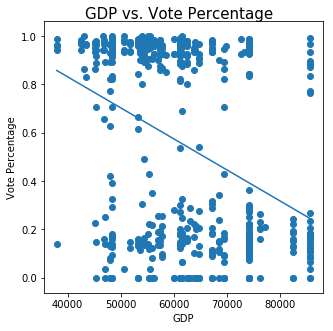

In [104]:
fig = plt.figure(figsize=(5,5))
plt.scatter(total_df['gdp'], total_df['vote_percentage'])
sorted_order = np.argsort(total_df['gdp'])
plt.plot(total_df['gdp'][sorted_order],predictions[sorted_order])
plt.xlabel('GDP')
plt.ylabel('Vote Percentage')
fig.suptitle('GDP vs. Vote Percentage', fontsize=15, y=0.92)

    10. What is the R^2 value of this relationship? (5 points)

In [105]:
r_squared = np.var(predictions) / np.var(total_df['vote_percentage'])
r_squared

0.12751704893821011

#### The R^2 value of this relationship is 0.12751704893821011

    11. If a representative comes from a state with a GDP of $50,000, what is the predicted percentage of time that representative will vote with Trump? (5 points)

In [106]:
y = slope*50000 + intercept
y

0.7029029463887216

In [107]:
y*100

70.29029463887217

#### The predicted percentage of time that a representative will vote with Trump if the state has a GDP of 50,000 dollars is 0.7029029463887216 (70.29%)

    12. What is the average percentage of time that representatives agreed with Trump given that they came from states with a GDP *greater than* $45,000 and *less than* $55,000? (6 points)

In [113]:
(total_df[(total_df['gdp'] > 45000) & (total_df['gdp'] < 55000)]).mean()

votes                195.900000
votes_for            134.514286
votes_against         61.050000
vote_percentage        0.662005
gdp                50053.464286
dtype: float64

#### The average percentage time that representative agreed with Trump given that they came from states with a GDP greater than 45,000 dollars and less than 55,000 dollars is 66.2 percent

    13. Plot the residuals plot. Is it homoskedastic or heteroskedastic? (5 points)

Text(0.5, 0.92, 'Residuals')

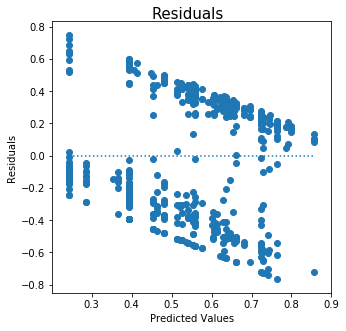

In [109]:
fig = plt.figure(figsize=(5,5))
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

#### The graph is heteroskedastic

    14. Overall do you think there's a linear relationship between these two variables? Why or why not? (4 points)

#### Yes there is a linear relationship between these two variables, because the graph is heteroskedastic.

    15. *BONUS* Given that the data looks at GDP at the state-level and voting percentage at the representative level, what data would improve this data set? (5 points)

####  The data should have instead focus on the GDP of the representative's district instead of the state GDP.  By looking at the representative's district GDP, one can better get a correlation between the GDP and voting of certain districts, and so on. 